In [5]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
path = 'C:/Users/COM/python_work/data/'
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999

In [6]:
sido = pd.read_csv(path+'시도별지역안전지표_2015.csv', encoding='cp949')
sigungu = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

## 데이터모양확인 및 split

In [7]:
sido.shape, sigungu.shape

((17, 331), (226, 310))

In [8]:
sido_y = sido.iloc[:,-7:]
sido_x = sido.iloc[:,3:-7]
sido_name = sido.iloc[:,:3]
sigungu_y= sigungu.iloc[:,-7:]
sigungu_x= sigungu.iloc[:,3:-7]
sigungu_name = sido.iloc[:,:3]

In [9]:
sido_y.shape, sido_x.shape,sido_name.shape

((17, 7), (17, 321), (17, 3))

In [10]:
sigungu_y.shape, sigungu_x.shape, sigungu_name.shape

((226, 7), (226, 300), (17, 3))

## 표준화 (MinmaxScaler)
* 다른 스케일러 robust_scale(), maxabs_scale(), scale(), 
* minmaxscaler() 범위조정(0,1)
* 로 만들어진 데이터셋도 시도해봐야한다.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)) #범위 임의지정했는데 괜?
#독립변수에 일괄적용
sido_x_scaled = scaler.fit_transform(sido_x)
sigungu_x_scaled = scaler.fit_transform(sigungu_x)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [12]:
#scale결과 array를 데이터프레임으로 만들고 열이름을 새로 지정해준다.
sigungu_x_scaled = pd.DataFrame(data = sigungu_x_scaled)
sigungu_x_scaled.columns = sigungu_x.columns
sido_x_scaled = pd.DataFrame(data = sido_x_scaled)
sido_x_scaled.columns = sido_x.columns

In [13]:
sido_x_scaled.shape, sigungu_x_scaled.shape

((17, 321), (226, 300))

## Feature Importance

In [14]:
rf = RandomForestClassifier(n_estimators=10).fit(sido_x_scaled, sido.화재)
feature_importance_rf = pd.DataFrame(data=np.c_[sido_x_scaled.columns.values,rf.feature_importances_],
                                     columns=['feature','importance'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

NaN이 포함되어있어 FI계산이 안됬다.
## FeatureImportance 전 결측치를 처리해야한다.

## 결측치처리
기존 sido와 sigungu의 모양을 확인해보고, 결측치를 처리한다.

모두 NaN값인 열은 아예없애고

20%이상의 결측 열은 지운다.

행을 지워야할(제주) 필요가 있을까..? 어쨌든 전국을 살피는건데. 이후순서로 빼자.

과거의 경향성으로 결측을 채울 수 있는지 살핀다.

In [15]:
#현재 sido와 sigungu의 모양을 보자
#결측치 위치(msno.matrix, isnull())
#결측치 갯수(msno.bar, isnull().sum())
#pd.concat으로 _name을 연결, 어느 위치인지 확인해볼 것 (그게 isnull()인가?)

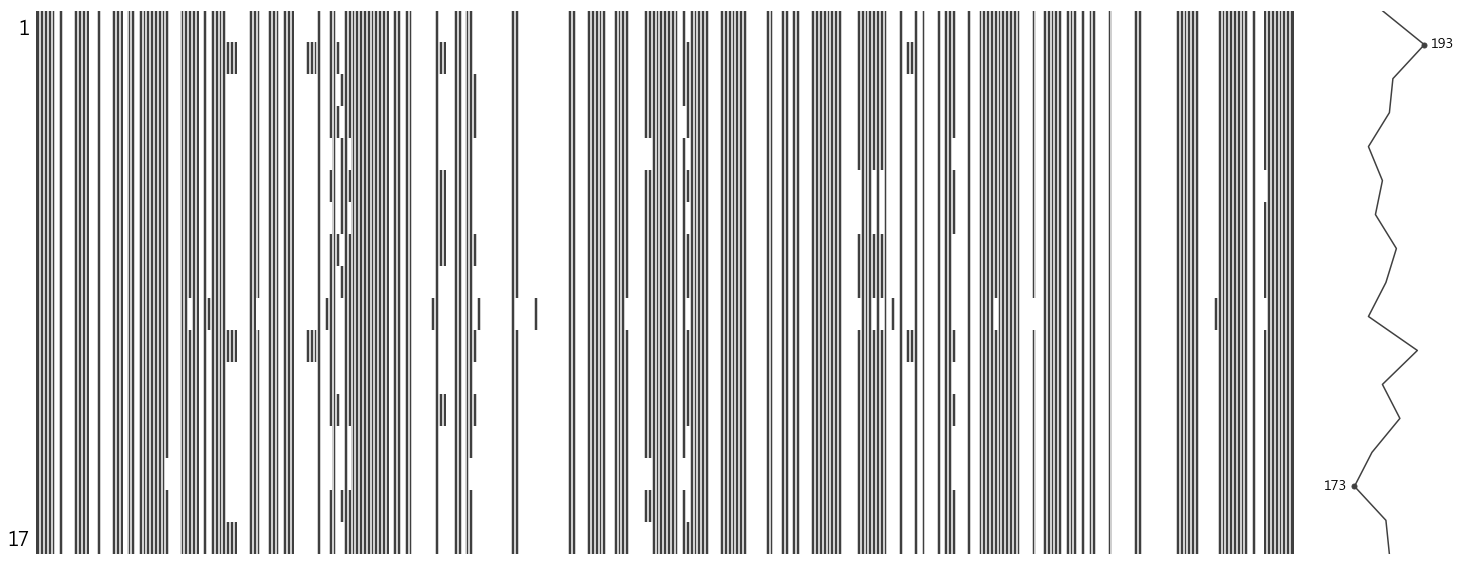

In [16]:
msno.matrix(sido)

In [17]:
sido_nullax1 = pd.DataFrame(data = sido_x_scaled.notnull().sum(axis=0), columns={'data'} )
sido_nullax1['결측비율']=round(sido_nullax1.data/(len(sido_x_scaled)),2)
sido_nullax1
#모든 시도에 대해 NaN인 열은 삭제한다.data가 0인경우 dropna(how='all')
#80%이상 결측인 열은 삭제한다.
#이전 자료로 결측을 채울 수 있는지 확인한다.

,data,결측비율
1인가구수,17,1.00
5대범죄 발생건수,17,1.00
가로등수,0,0.00
가스공급설비 면적,17,1.00
가스사고 발생건수,0,0.00
가스사고 부상자수,0,0.00
가스사고 사망자수,0,0.00
가스사고발생건수,17,1.00
가해(타살) 사망자수,17,1.00
감염병 발생건수,17,1.00


In [18]:
df = pd.DataFrame(data = sido_x_scaled.notnull().sum(axis=1), columns={'data'} )
sido_nullax0 = pd.concat([sido_name.시도, df], axis=1)
sido_nullax0['결측비율']=round(sido_nullax0.data/sido_x_scaled.shape[1],2)
sido_nullax0

,시도,data,결측비율
0,강원도,171,0.53
1,경기도,183,0.57
2,경상남도,174,0.54
3,경상북도,173,0.54
4,광주광역시,167,0.52
5,대구광역시,171,0.53
6,대전광역시,169,0.53
7,부산광역시,175,0.55
8,서울특별시,172,0.54
9,세종특별자치시,167,0.52


In [19]:
len(sido_nullax1.loc[(sido_nullax1.결측비율==0)])
len(sido_nullax1.loc[(sido_nullax1.결측비율==1)])
len(sido_nullax1.loc[(sido_nullax1.결측비율!=0)&(sido_nullax1.결측비율!=1)])

39

In [20]:
df = sido_nullax1.loc[(sido_nullax1.결측비율!=0)&(sido_nullax1.결측비율!=1)]
df

,data,결측비율
교통사고사망자수(고속도로),16,0.94
구급발생건수,16,0.94
급경사지 붕괴위험지구 수,1,0.06
놀이시설사고 발생건수,3,0.18
놀이시설사고 부상자수,3,0.18
놀이시설사고 사망자수,3,0.18
대기오염도,16,0.94
레저(생활체육)사고 발생건수,2,0.12
레저(생활체육)사고 부상자수,2,0.12
레저(생활체육)사고 사망자수,2,0.12


In [ ]:
######################################################

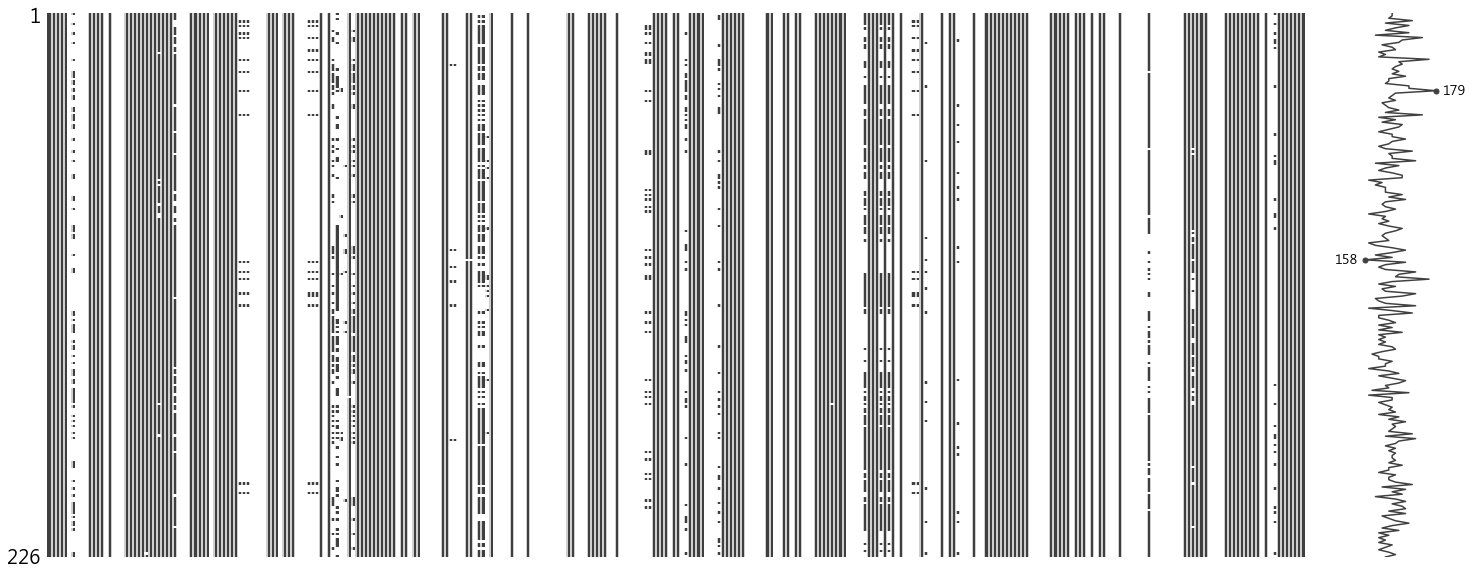

In [16]:
msno.matrix(sigungu)

In [53]:
sigungu_nullax1 = pd.DataFrame(data = sigungu_x_scaled.notnull().sum(axis=0), columns={'data'} )
sigungu_nullax1

,data
1인가구수,226
5대범죄 발생건수,226
가로등수,0
가스공급설비 면적,83
가스사고 발생건수,0
가스사고 부상자수,0
가스사고 사망자수,0
가스사고발생건수,226
가해(타살) 사망자수,226
감염병 발생건수,226


In [54]:
df = pd.DataFrame(data = sigungu_x_scaled.notnull().sum(axis=1), columns={'data'} )
sigungu_nullax0 = pd.concat([sigungu_name.시도, df], axis=1)
sigungu_nullax0

,시도,data
0,강원도,156
1,경기도,156
2,경상남도,155
3,경상북도,162
4,광주광역시,154
5,대구광역시,161
6,대전광역시,157
7,부산광역시,154
8,서울특별시,161
9,세종특별자치시,151


In [2]:
msno.matrix(sido_x_scaled.dropna(how='all',axis=1).iloc[:5])

NameError: name 'msno' is not defined

In [ ]:
df = sido_x_scaled.dropna(how='all',axis=1)
df.shape

In [53]:
df.notnull().sum(axis=1)

0     171
1     183
2     174
3     173
4     167
5     171
6     169
7     175
8     172
9     167
10    181
11    171
12    176
13    168
14    163
15    172
16    173
dtype: int64

In [56]:
pd.concat([sido_name,df],axis=1)

,년도,시도,지역,1인가구수,5대범죄 발생건수,가스공급설비 면적,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공공질서 및 안전예산 비율,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,놀이시설사고 발생건수,놀이시설사고 부상자수,놀이시설사고 사망자수,다중이용업소수,대기배출시설 점검 위반율,대기오염도,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,레저(생활체육)사고 발생건수,레저(생활체육)사고 부상자수,레저(생활체육)사고 사망자수,무면허교통사고 발생건수,반지하가구 수,방수시설 면적,방재지구 면적,방조설비 면적,방화성 산불건수,방화지구 면적,배수시설 면적,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,사방설비 개소,사방설비 면적,산림면적,산림면적 비율,산불발생건수,산불피해면적,산사태 발생면적,산사태위험지역 면적,상업지역 면적,성폭력 발생건수,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,식중독 발생건수,식중독 발생자수,식품제조가공업체 위반건수,실업률,야간산불건수,야간산불면적,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 식품안전보호구역수,어린이 아토피,어린이 천식,열공급설비 면적,오존경보 발생횟수,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,위험물 제조소수,유류저장 및 송유설비 면적,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,일반주거지역 면적,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액,자연재해 피해액(10년평균),자연재해 피해자수,자연재해 피해자수(10년평균),자연재해위험개선지구 수,자원봉사자 등록률,자전거사고 부상자수,자전거사고 사망자수,장애인수,재난심리지원센터수,재난약자수,재정자립도,재정자주도,저수지 저수용량,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역별 부도업체수,지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,폐기물 처리시설수,폐수배출시설 점검 위반율,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,황사 발생건수
0,2015,강원도,2015_강원도,0.744912,-0.213054,-0.995435,0.399055,1.000000,-0.041974,0.442652,0.438481,1.000000,0.813305,-1.000000,0.127953,0.395304,0.200741,-0.489123,-1.000000,-0.252767,0.377536,0.646044,0.185615,-0.616618,-0.478646,-0.479187,-0.014537,0.479461,1.000000,0.555986,NaN,0.334182,0.654175,0.787527,-0.041609,NaN,NaN,NaN,0.108282,-0.930703,0.626599,-1.000000,-1.000000,-1.000000,-0.668764,-0.668764,-0.015644,NaN,NaN,NaN,0.164379,NaN,-0.961538,-1.000000,NaN,NaN,-0.982294,-1.000000,-0.196537,0.321909,-0.318564,-0.115232,-0.421122,0.059740,0.151569,-0.719864,0.274100,-0.384321,0.366020,0.464836,-0.998613,-0.805287,NaN,1.000000,NaN,NaN,1.000000,1.000000,-0.723602,-0.822809,NaN,NaN,-1.000000,-0.750712,NaN,-0.909918,-0.500,-1.000000,0.260176,-0.900330,-0.874233,-0.168350,-0.363270,-0.730886,0.546011,-0.185185,-0.922711,-0.948718,0.775302,0.452381,0.946555,-0.458258,0.685040,0.019098,-0.833298,-1.000000,NaN,-1.000000,0.695652,0.077922,0.604938,0.215247,-0.998465,-0.657127,-0.657099,-0.578405,1.000000,0.331049,0.164379,-0.592681,0.155886,-0.653026,-0.648298,-0.932898,0.150697,0.462035,0.032017,-1.000000,0.027027,-1.000000,1.000000,-0.199887,1.000000,-1.000000,-1.000000,-1.0,-0.919283,-0.988223,-0.165340,-1.0,-0.952632,NaN,-0.246341,NaN,NaN,0.381189,-0.820999,0.369474,-0.854054,-0.764634,-0.999988,0.726435,-0.7184,-0.716435,-0.629729,-0.761216,0.081761,-1.000000,-0.772439,-0.600471,0.429701,0.026205,-0.330119,-0.565856,0.597396,0.0,-0.276305,0.437329,-0.360955,0.424802,-0.809547,-0.169017,-0.357150,-0.805517,0.136889,0.459401,-0.627074,-0.892720,-0.576324,-0.576311,-0.676859,0.889570,0.444440,1.000000,NaN,0.762586,0.087618,0.963566,0.003783,-0.328046,0.552240,0.273422,0.255925,-1.000000,-0.820725
1,2015,경기도,2015_경기도,-0.711196,-0.264338,-0.955469,-0.081972,-0.559715,-0.431813,-0.992383,-0.548652,-0.661542,-0.643570,-0.665931,-0.852537,-0.692709,-0.796788,-1.000000,-0.744827,0.286793,0.123824,0.026463,-0.660954,-0.480930,0.311039,0.310917,-0.569860,-0.196400,-0.977905,-0.564413,NaN,-0.875527,-0.719461,-0.873403,-0.802928,1.000000,1.000000,1.0,-0.641401,1.000000,1.000000,-0.569492,-0.569521,-0.819522,-0.342412,-0.342409,

<pre>
데이터의 속성 필드 값이 비어있을 때
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
1. 데이터의 양이 충분한 경우 dropna() - 하나라도 na면 다 드랍함. 모두 채워져있는 열은 없음
    a. how=’all’ 지정: 모든 속성이 다 비워져있는 열들만 삭제
    b. N/A 값을 가질 수 있는 최소 개수를 thresh 인자로 명기
2. 데이터의 양이 부족한 경우 치환
</pre>
exlink : https://roboreport.co.kr/sklearn%EC%97%90%EC%84%9C-missing-value-%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0-by-pandas/

파이썬 결측치 확인하는 missingno 패키지
https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221623491491

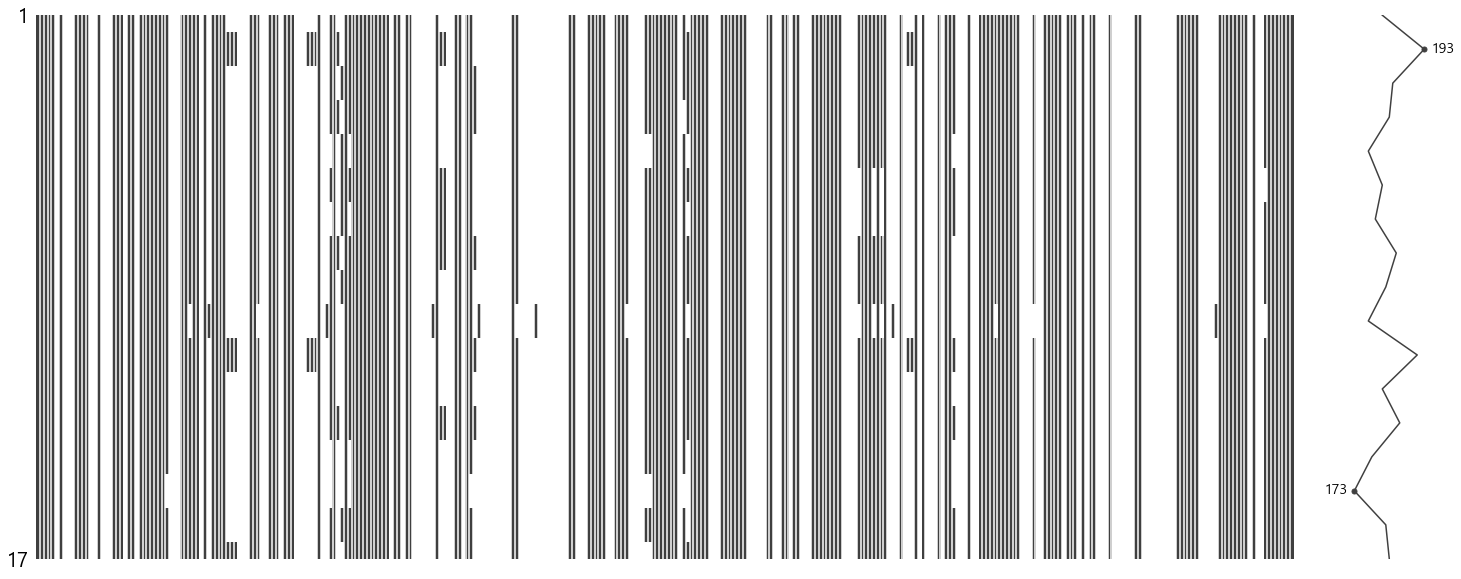

In [25]:
msno.matrix(sido) #결측치의 위치를 보여줌

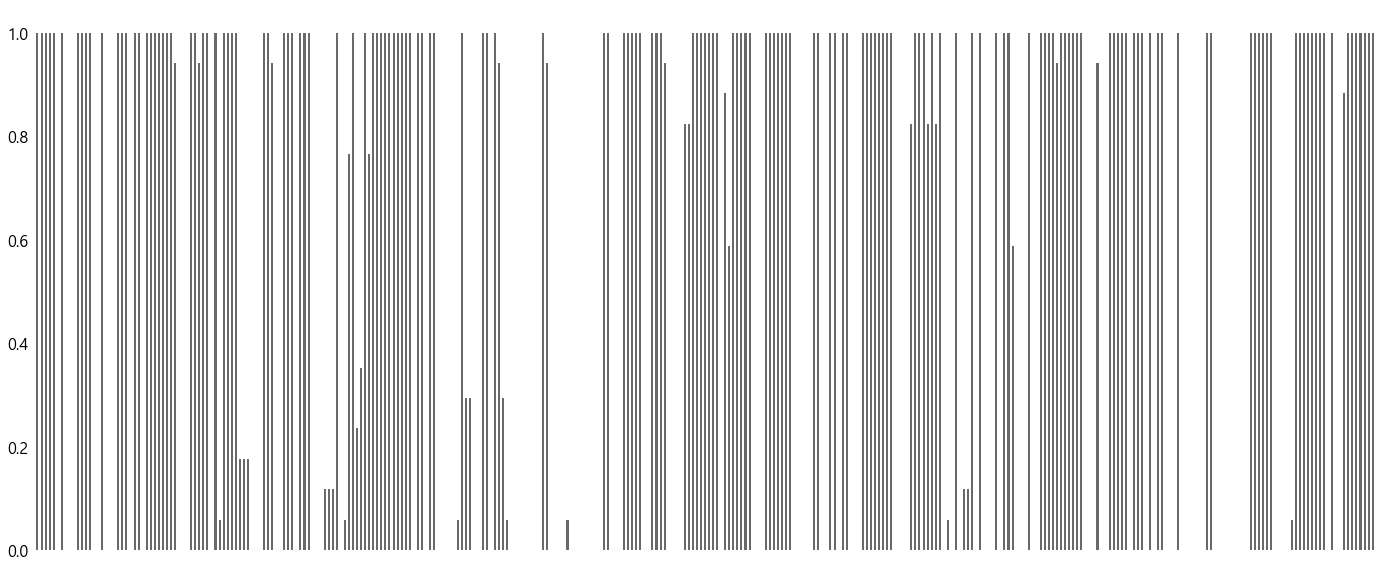

In [37]:
msno.bar(sido) #결측치가 합해진 값을 보여줌

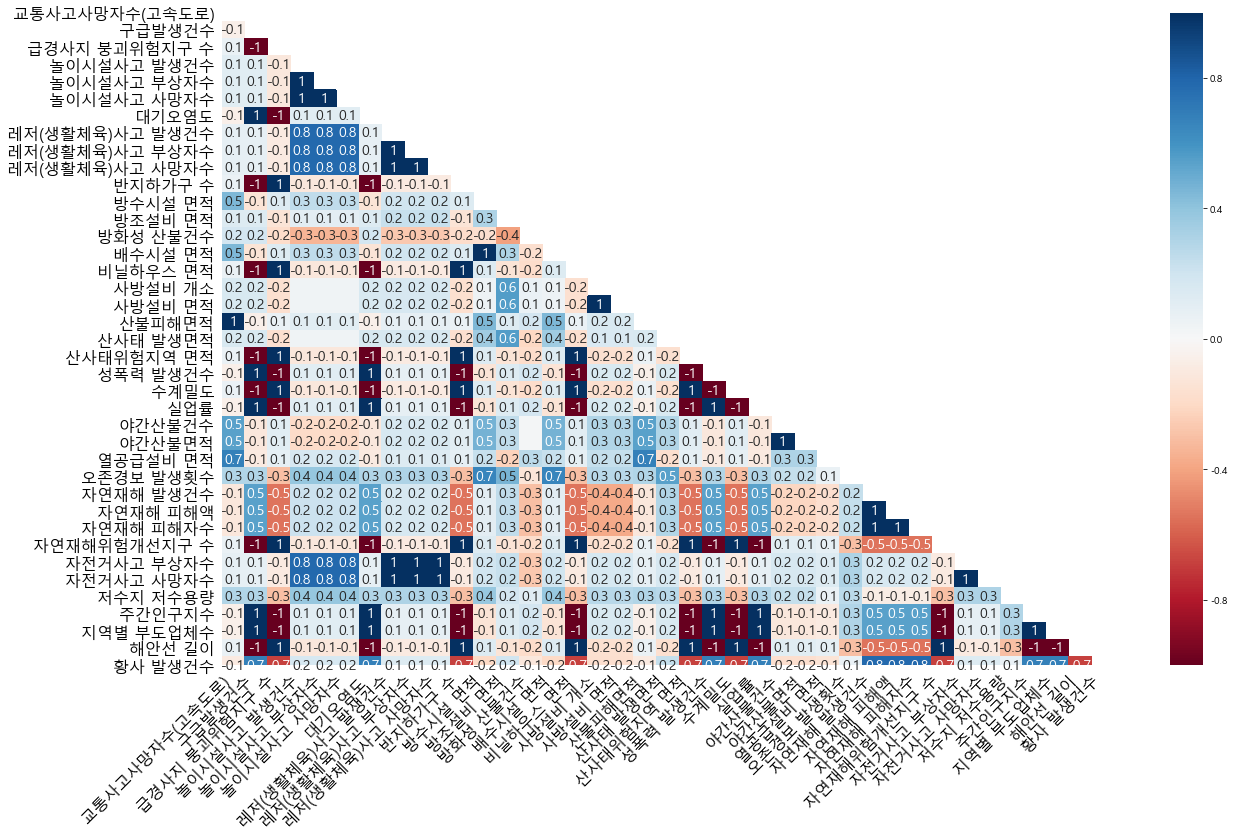

In [38]:
msno.heatmap(sido)
#열에 결측치가 하나도 없거나 아예 비어있는 변수들은 의미있는 상관관계를 나타내지 않아 자동제거된다.

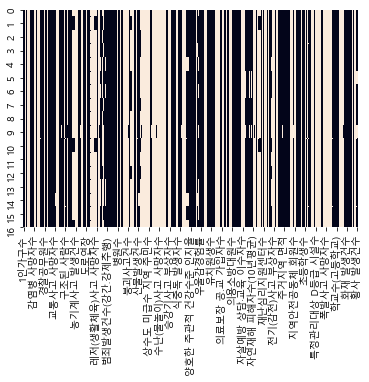

In [32]:
sns.heatmap(sido_x.isnull(),cbar=False)

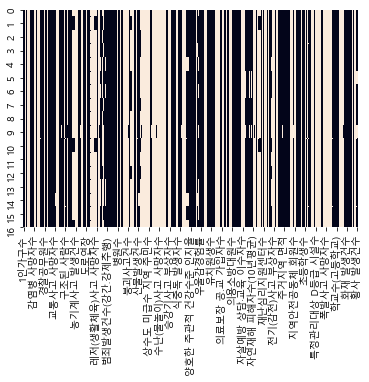

In [36]:
sns.heatmap(sido_x_scaled.isnull(),cbar=False)